In [211]:
import numpy as np
import pandas as pd

In [212]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [213]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2025,ham,"Yes obviously, but you are the eggs-pert and t...",NaN,NaN,NaN
3752,ham,Ya that one is slow as poo,NaN,NaN,NaN
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...,NaN,NaN,NaN
1360,ham,Yo dude guess who just got arrested the other day,NaN,NaN,NaN
393,ham,Yes i think so. I am in office but my lap is i...,NaN,NaN,NaN


In [214]:
df.shape

(5572, 5)

1. Data Cleaning

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [216]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [217]:
df.sample(5)

,v1,v2
5133,ham,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ..."
2713,ham,Nope i'm not drivin... I neva develop da photo...
5390,ham,Nt joking seriously i told
1017,ham,Shall i send that exe to your mail id.
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."


In [218]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'}, inplace=True)

In [219]:
df.sample(5)

,target,text
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1678,ham,So many people seems to be special at first si...
659,spam,88800 and 89034 are premium phone services cal...
4469,ham,"Lemme know when I can swing by and pick up, I'..."
3256,ham,"No, but you told me you were going, before you..."


In [220]:
#Lable encoding on target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [221]:
df['target']=encoder.fit_transform(df['target'])

In [222]:
df.sample(5)

,target,text
1126,0,Not tonight mate. Catching up on some sleep. T...
5152,0,Idk. I'm sitting here in a stop and shop parki...
3256,0,"No, but you told me you were going, before you..."
3044,0,"Hello, yeah i've just got out of the bath and ..."
1061,0,I might come to kerala for 2 days.so you can b...


In [223]:
#Missing Values

In [224]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [225]:
#Chechking for Duplicates
df.duplicated().sum()

403

In [226]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')

In [227]:
#Chechking for Duplicates
df.duplicated().sum()

0

In [228]:
df.shape

(5169, 2)

2-EDA

In [229]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

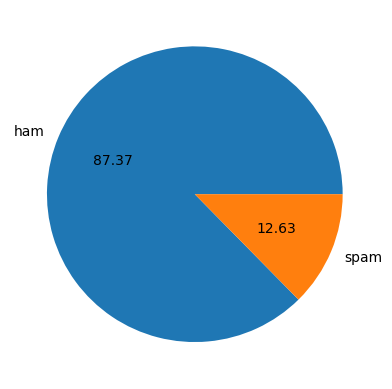

In [230]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [231]:
#Data is imbalanced
#For deeper analysis we make three more columns numofchar numofwords numofsentences

In [232]:
#used for deeper analysis
!pip install nltk

In [233]:
import nltk

In [86]:
#Download some dependenties
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [87]:
#Count Characters
#Ye har msg ki length(number of characters) btay ga
df['num_characters']=df['text'].apply(len)

In [88]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [89]:
#Count Number of Words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [90]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [91]:
#Count Number of Sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [74]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_file("EDA_Spam.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.12it/s]
E:\Newfolder\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 9 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
#HAM MSGS KA DESCRIBE
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#SPAM MSGS KA DESCRIBE
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [78]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

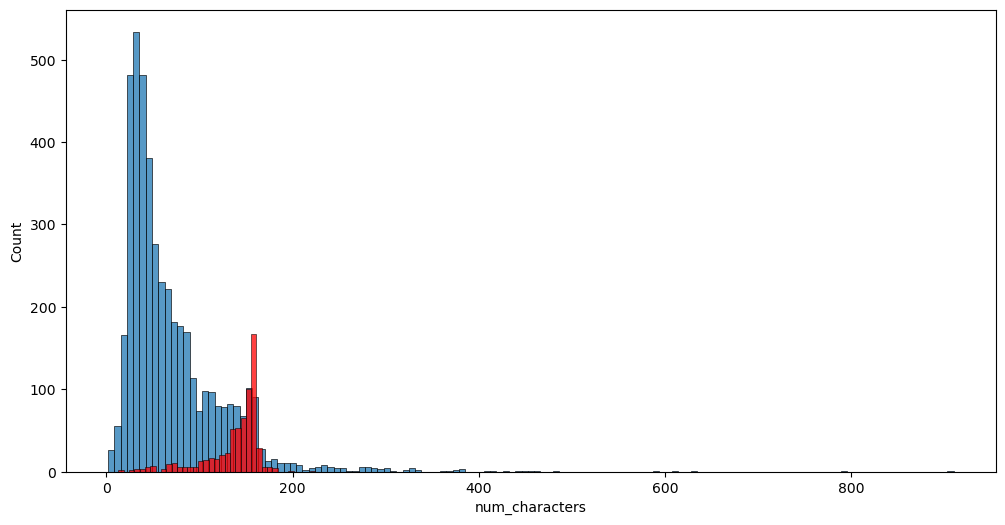

In [79]:
#Histogram of Msgs (Number of characters)
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

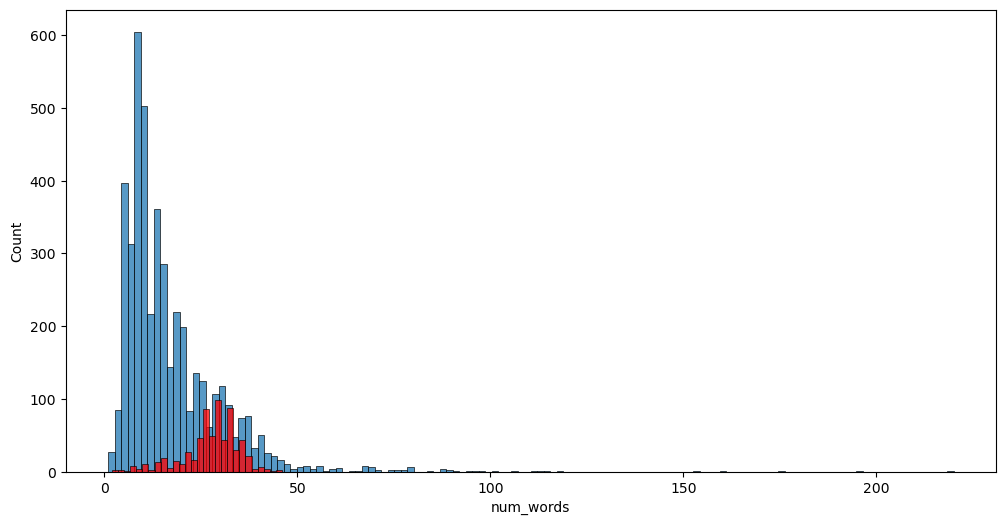

In [80]:
#Histogram of Msgs (Number of words)
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

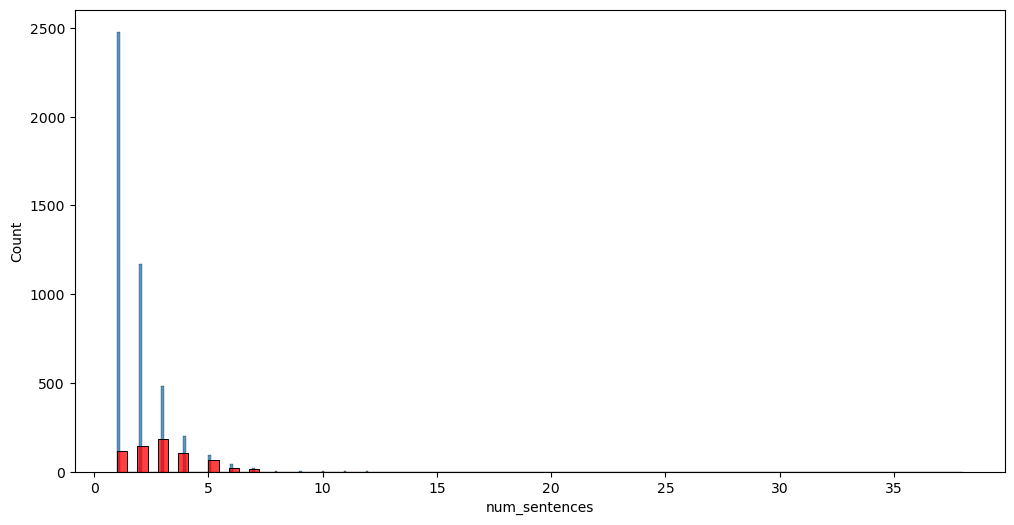

In [81]:
#Histogram of Msgs (Number of sentences)
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

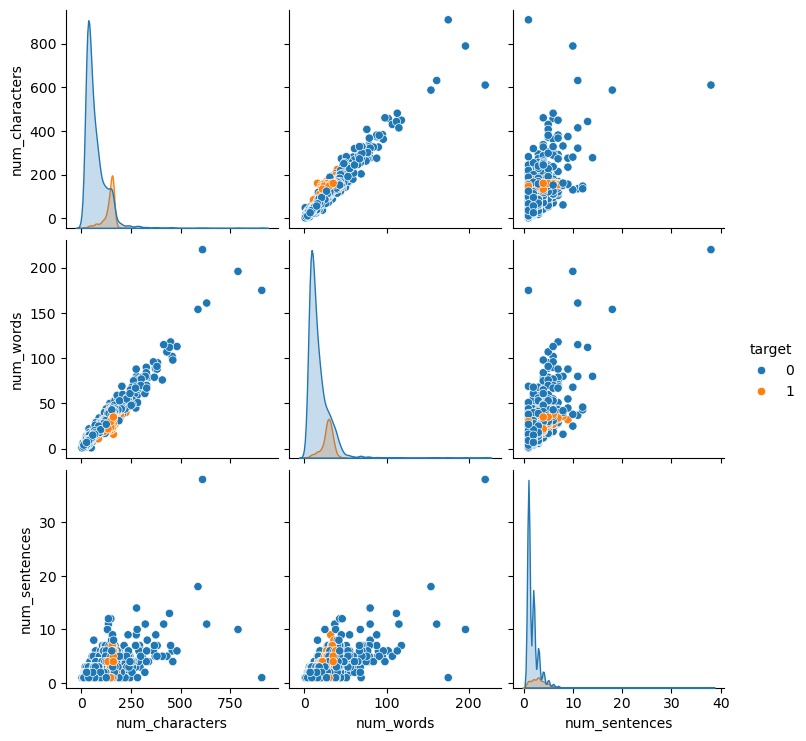

In [82]:
sns.pairplot(df,hue='target')

<Axes: >

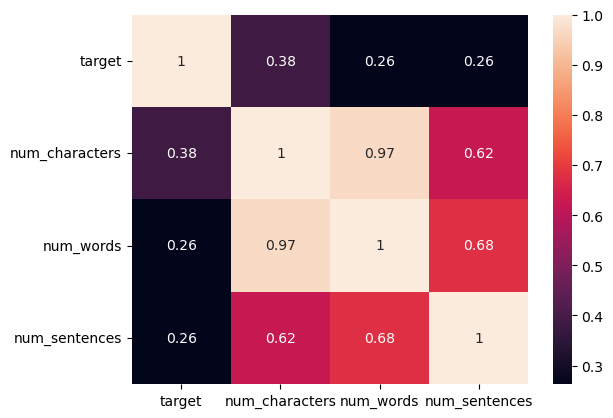

In [83]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

3-Data Preprocessing
    *Lower Case
    *Tokenization
    *Removing Special Characters
    *Removing Stop words and Punctuation
    *Stemming

In [84]:
#Use for Removing Stop words and Punctuation
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
#Use for Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [85]:
def transform_text(text):
    # Lower case
    text = text.lower() 
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    #Removing Special Characters there is text converted into list so we use loop
    templist=[]
    for i in text:
        if i.isalnum():
           templist.append(i) 
    #Removing Stop words and Punctuation
    text=templist[:]
    templist.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            templist.append(i)
    #Stemming
    text=templist[:]
    templist.clear()
    for i in text:
        templist.append(ps.stem(i))
    #Return as String
    return " ".join(templist)

In [92]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [93]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [94]:
#Applying the transform_text method on dataset and create a new column transformed_text
df['transformed_text']=df['text'].apply(transform_text)

In [95]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [96]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [97]:
#World Cloud of Spam MSGS
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

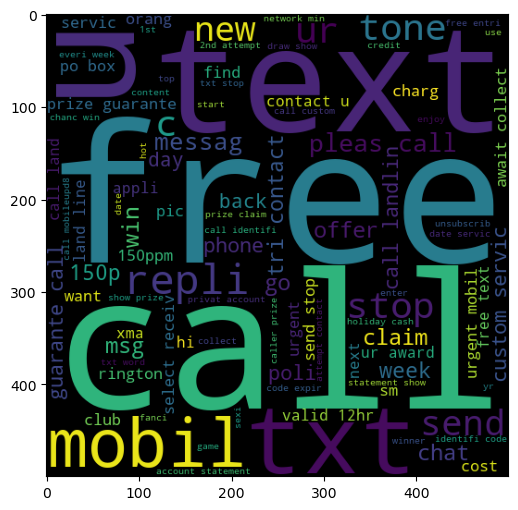

In [98]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [99]:
#World Cloud of Ham MSGS
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

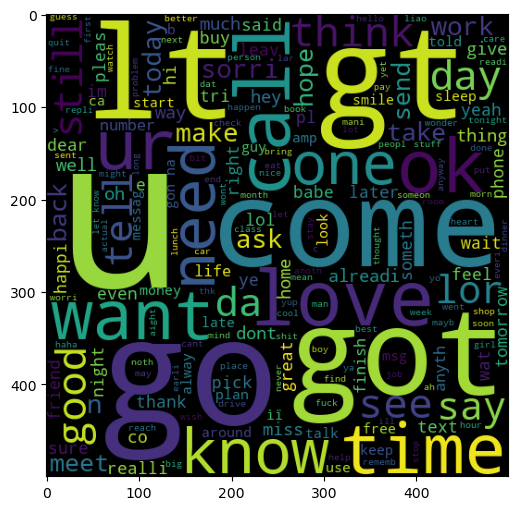

In [100]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [101]:
#Top 30 words in MSGS of Spam
spam_words = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)
        

In [102]:
len(spam_words)

9939

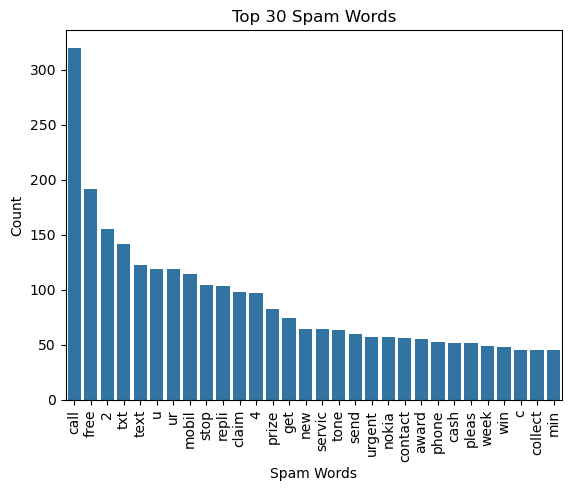

In [103]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xlabel('Spam Words') 
plt.ylabel('Count')   
plt.xticks(rotation='vertical')
plt.title('Top 30 Spam Words')
plt.show()

In [104]:
#Top 30 words in MSGS of Ham
ham_words = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)
        

In [105]:
len(ham_words)

35404

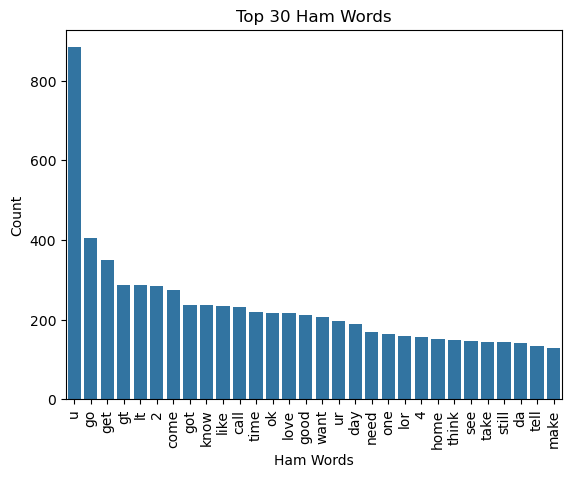

In [106]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xlabel('Ham Words') 
plt.ylabel('Count') 
plt.xticks(rotation='vertical')
plt.title('Top 30 Ham Words')
plt.show()

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4-Model Building

In [173]:
# Text Vectorization using Bag of Words beacues algorithm understand only numerical data but our input(transformed_text) is text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
#Vectorize Input Column
X = tfidf.fit_transform(df['transformed_text']).toarray()
#Target column
y = df['target'].values

In [174]:
X.shape

(5169, 3000)

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [177]:
#Three Naive Based Algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
# Apply Gaussian Naive Based Algo
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("\n--- Accuracy Score Gaussian Naive Based Algo ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred1) * 100:.2f}%")
print("\n--- Confusion Matrix Gaussian Naive Based Algo ---")
print(confusion_matrix(y_test,y_pred1))
print("\n--- Precision Score Gaussian Naive Based Algo ---")
print(f"Precision: {precision_score(y_test, y_pred1) * 100:.2f}%")


--- Accuracy Score Gaussian Naive Based Algo ---
Accuracy: 86.94%

--- Confusion Matrix Gaussian Naive Based Algo ---
[[788 108]
 [ 27 111]]

--- Precision Score Gaussian Naive Based Algo ---
Precision: 50.68%



--- Confusion Matrix Gaussian Naive Based Algo ---


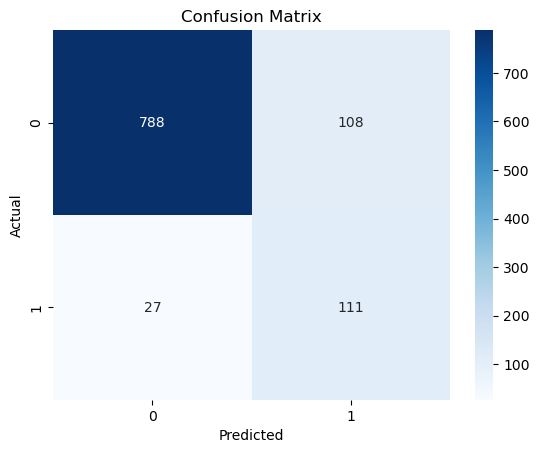

In [179]:
#Gaussian Naive Based Algo ka Confusion Matrix
print("\n--- Confusion Matrix Gaussian Naive Based Algo ---")
conf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [180]:
# Apply Multinomial Naive Based Algo
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("\n--- Accuracy Score Multinomial Naive Based Algo ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred2) * 100:.2f}%")
print("\n--- Confusion Matrix Multinomial Naive Based Algo ---")
print(confusion_matrix(y_test,y_pred2))
print("\n--- Precision Score Multinomial Naive Based Algo ---")
print(f"Precision: {precision_score(y_test, y_pred2) * 100:.2f}%")


--- Accuracy Score Multinomial Naive Based Algo ---
Accuracy: 97.10%

--- Confusion Matrix Multinomial Naive Based Algo ---
[[896   0]
 [ 30 108]]

--- Precision Score Multinomial Naive Based Algo ---
Precision: 100.00%



--- Confusion Matrix Multinomial Naive Based Algo ---


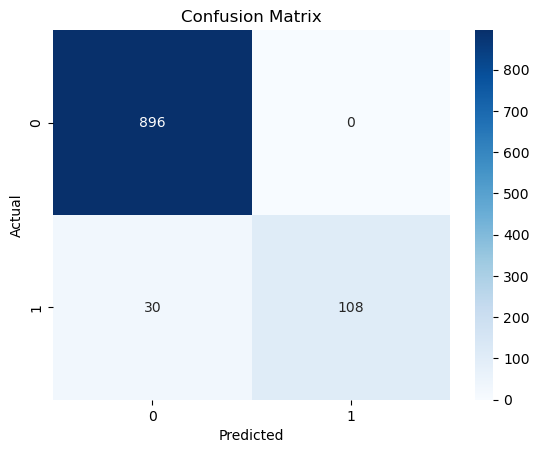

In [181]:
#Multinomial Naive Based Algo ka Confusion Matrix
print("\n--- Confusion Matrix Multinomial Naive Based Algo ---")
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [182]:
# Apply Bernoulli Naive Based Algo
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("\n--- Accuracy Score Bernoulli Naive Based Algo ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred3) * 100:.2f}%")
print("\n--- Confusion Matrix Bernoulli Naive Based Algo ---")
print(confusion_matrix(y_test,y_pred3))
print("\n--- Precision Score Bernoulli Naive Based Algo ---")
print(f"Precision: {precision_score(y_test, y_pred3) * 100:.2f}%")


--- Accuracy Score Bernoulli Naive Based Algo ---
Accuracy: 98.36%

--- Confusion Matrix Bernoulli Naive Based Algo ---
[[895   1]
 [ 16 122]]

--- Precision Score Bernoulli Naive Based Algo ---
Precision: 99.19%



--- Confusion Matrix Bernoulli Naive Based Algo ---


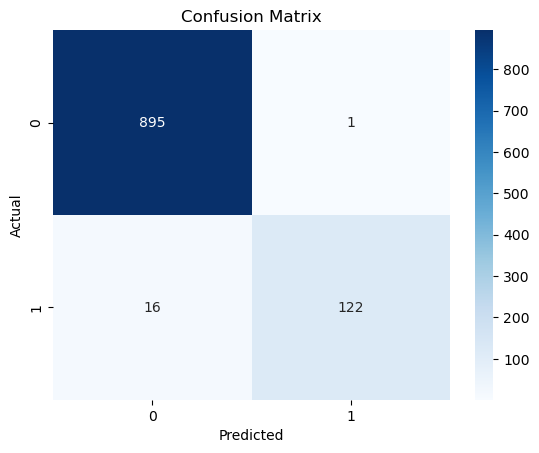

In [183]:
#Bernoulli Naive Based Algo ka Confusion Matrix
print("\n--- Confusion Matrix Bernoulli Naive Based Algo ---")
conf_matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [184]:
#We Select TfidfVectorizer and Multinomial Naive Based Algo 

In [185]:
#We import Classifier Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
#We Create Objects of Algorithms
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [187]:
#We Create A Dictionary where in Keys There is the name of Algorithms and in the Values There are objects of algorithms
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [188]:
#Create a Method that takes a classifier Algo and Training,Testing data and then give the Accuracy and Precision of That Algo
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return {'accuracy': accuracy, 'precision': precision}

In [189]:
#Testing(Example of) the Above Method
results = train_classifier(rfc, X_train, y_train, X_test, y_test)
print("Accuracy:", results['accuracy'])
print("Precision:", results['precision'])

Accuracy: 0.9758220502901354
Precision: 0.9829059829059829


In [190]:
#Yaha Pa Hum ny AK loop lagaya jo clfs pa chla ra ha aur wo har dafa ak algo la ka us pa model train kar ra ha
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
       result = train_classifier(clf, X_train, y_train, X_test, y_test)
       print("For", name)
       print("Accuracy -", result['accuracy'])
       print("Precision -", result['precision'])

       accuracy_scores.append(result['accuracy'])
       precision_scores.append(result['precision'])


For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9323017408123792
Precision - 0.8333333333333334
For LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829


E:\Newfolder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192


In [192]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [193]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [194]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


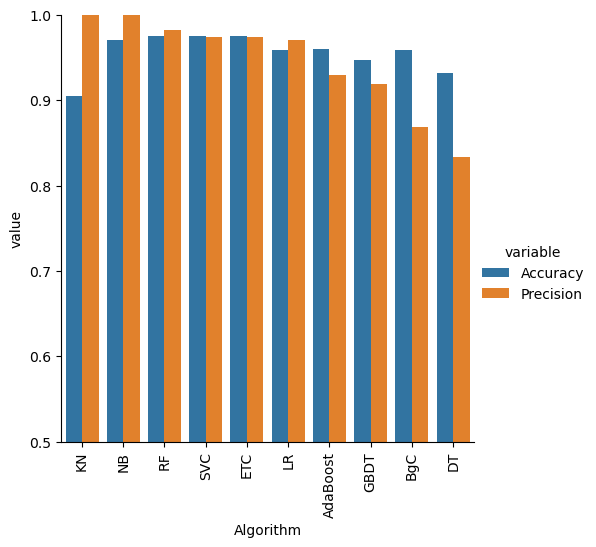

In [195]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [206]:
# Voting Classifier of our best Performing Models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),('rf',rfc)],voting='soft')

In [207]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [208]:
y_pred = voting.predict(X_test)
print("Accuracy of Voting Classifier",accuracy_score(y_test,y_pred))
print("Precision of Voting Classifier",precision_score(y_test,y_pred))

Accuracy of Voting Classifier 0.9796905222437138
Precision of Voting Classifier 0.9915966386554622


In [209]:
#BY Doing All of this we Conclude that we Use Multinomial Naive Based Algo Because it give best Performance
#For an email we need to do 3 steps (1-Preprocessing , 2-Vectorization(we use TfidfVectorizer) , 3- Applying Model )

In [210]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))